<p align="center"><h1 align="center">Adcanced Machine Learning Models Applied to COVID Diagnosing <br> Data Augmentation and Visualization <br>Spring 2024 <br> Nicholas Choong, Qiankun Li</h1>

---
<br>



# **STEP 1: Import packages and extract the dataset**

**Download the zip file and upload the zip file to your drive. The code assume you will upload it to your base folder in drive... however you can change the directory (just make sure to update the path accordingly)**

In [1]:
!pip install opencv-python-headless

In [2]:
# Load libraries and then download data
import pandas as pd
import sys
import time
import cv2
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
import os
import zipfile
import matplotlib.pyplot as plt
import os
from PIL import Image
import numpy as np
from itertools import repeat
from sklearn.model_selection import train_test_split
from tensorflow.python.keras.utils import np_utils
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, BatchNormalization
from tensorflow.python.keras.layers.convolutional import Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from tensorflow.keras.applications import VGG19, ResNet50, InceptionV3

In [3]:
# Specify the path to your dataset zip file
zip_file_path = r'C:\Users\l\Downloads\COVID-19_Radiography_Dataset.zip'
# Specify the extraction path, the empty file location you want to put your files in 
extraction_path = r'C:\Users\l\Downloads\Extracted Dataset'
# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_path)
print("Dataset extracted successfully.")

Dataset extracted successfully.


# **STEP 2: Prepare the dataset**

In [4]:
# Extracting all filenames iteratively
base_path = r'C:\Users\l\Downloads\Extracted Dataset\COVID-19_Radiography_Dataset'
categories = ['COVID/images', 'Normal/images', 'Viral Pneumonia/images']

# load file names to fnames list object
fnames = []
for category in categories:
    image_folder = os.path.join(base_path, category)
    file_names = os.listdir(image_folder)
    full_path = [os.path.join(image_folder, file_name) for file_name in file_names]
    fnames.append(full_path)


print('number of images for each category:', [len(f) for f in fnames])
#print(fnames[0:2]) #examples of file names

number of images for each category: [3616, 10192, 1345]


#### We notice that there is a slight class imbalance, with the number of images in the "Normal" class being much higher compared to the "COVID" and "Viral Pneumonia" classes. This could potentially lead to biases in model training, where the model might become more biased towards predicting the majority class. Next we try to balance the data. 

In [5]:
#Reduce number of images to first 1345 for each category
fnames[0] = fnames[0][0:1344]
fnames[1] = fnames[1][0:1344]
fnames[2] = fnames[2][0:1344]

# Reduce number of images to first 1345 for each category to balance the dataset
fnames = [f[:1344] for f in fnames]


# **STEP 3: Data Augmentation**

- **Data Augmentation Description:**
  - Data augmentation is a technique used to artificially expand a dataset by creating modified versions of images or samples in the dataset.
  - It is commonly used in computer vision and natural language processing tasks to improve the performance and robustness of machine learning models.

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Setting up the data augmentation configuration
data_augmentation = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)


In [7]:
# Select a single image from each category to demonstrate the augmentation.
sample_images = [fnames[i][0] for i in range(len(categories))]  # First image from each category


# **STEP 4: Visualization Data Augmentation**

## In the following code we use majorly two types of Data Augmentation:

- **Symmetry:** Involves flipping an image horizontally or vertically to create new samples.
- **Rotation:** Rotating an image by a certain angle to create new samples.


Category: COVID


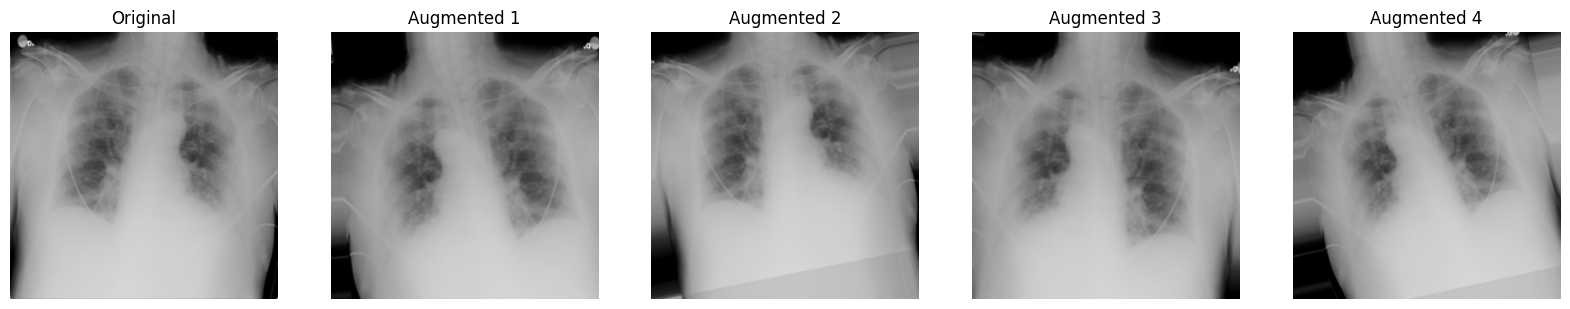

Category: Normal


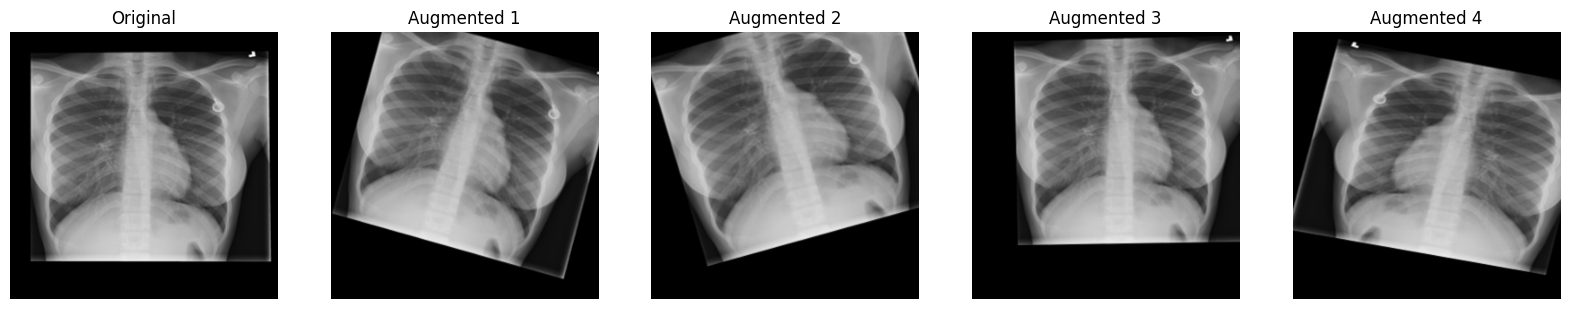

Category: Viral Pneumonia


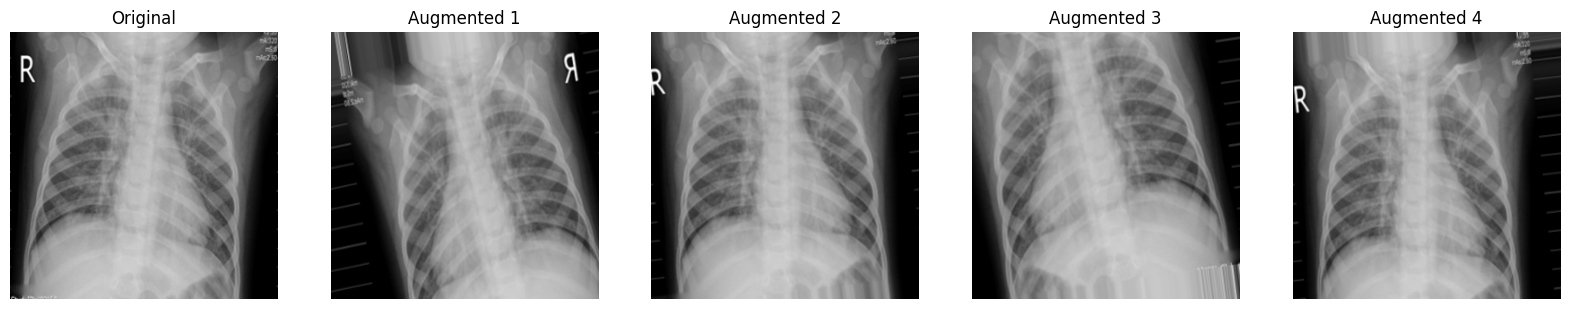

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def visualize_augmentation(image_path, data_augmentation, num_examples=4):
    img = load_img(image_path)  # Load the original image
    img_array = img_to_array(img)  # Convert the image to a numpy array
    img_array = img_array.reshape((1,) + img_array.shape)  # Reshape image

    fig, axes = plt.subplots(1, num_examples + 1, figsize=(20, 10))  # Setup the plot

    # Plot the original image
    axes[0].imshow(img)
    axes[0].set_title('Original')
    axes[0].axis('off')

    # Generate and plot {num_examples} augmented images
    i = 1
    for batch in data_augmentation.flow(img_array, batch_size=1):
        ax = axes[i]
        ax.imshow(np.uint8(batch[0]))
        ax.set_title(f'Augmented {i}')
        ax.axis('off')
        i += 1
        if i > num_examples:
            break

    plt.show()

# Apply the function to each sample image
category_names = ['COVID', 'Normal', 'Viral Pneumonia']
for image_path, category_name in zip(sample_images, category_names):
    print(f"Category: {category_name}")
    visualize_augmentation(image_path, data_augmentation)

### Now our dataset is 5 time as large as the originial one